In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import tensorflow.keras.utils as utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# 1. 데이터 셋 생성
width = 28; height = 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width*height).astype('float32')/255.0
x_test = x_test.reshape(10000, width*height).astype('float32')/255.0

x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(y_test)


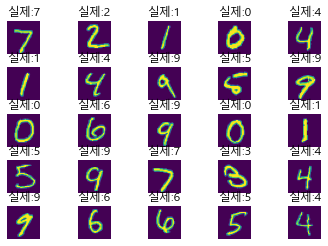

<Figure size 1296x1296 with 0 Axes>

In [9]:
plt_row = 5
plt_col = 5
# plt.figure(figsize=(18,18))
plt.rcParams['figure.figsize']=(10,10)
plt.rc("font",family="Malgun Gothic")
fig, axarr = plt.subplots(plt_row, plt_col)
plt.subplots_adjust(hspace=0.4, wspace=0.3)


#axarr[0,0].imshow(x_test[0].reshape(width, height))
for i in range(plt_row * plt_col):
    sub_plot = axarr[i//plt_col,i%plt_col]
    sub_plot.imshow(x_test[i].reshape(width, height))
    sub_plot.axis('off')
    sub_plot.set_title("실제:"+str(np.argmax(y_test[i])))



# DNN

Epoch 1/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2241 - accuracy: 0.9320 - val_loss: 0.1118 - val_accuracy: 0.9647
Epoch 2/30
1563/1563 [==============================] - 2s 2ms/step - loss: 0.1006 - accuracy: 0.9693 - val_loss: 0.0872 - val_accuracy: 0.9731
Epoch 3/30
1563/1563 [==============================] - 2s 2ms/step - loss: 0.0683 - accuracy: 0.9796 - val_loss: 0.0965 - val_accuracy: 0.9729
Epoch 4/30
1563/1563 [==============================] - 2s 2ms/step - loss: 0.0530 - accuracy: 0.9831 - val_loss: 0.0877 - val_accuracy: 0.9761
Epoch 5/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0430 - accuracy: 0.9862 - val_loss: 0.0951 - val_accuracy: 0.9759
Epoch 6/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0360 - accuracy: 0.9886 - val_loss: 0.1270 - val_accuracy: 0.9683
Epoch 7/30
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0312 - accuracy: 0.9898 - val_loss: 0.0938 - val_accuracy:

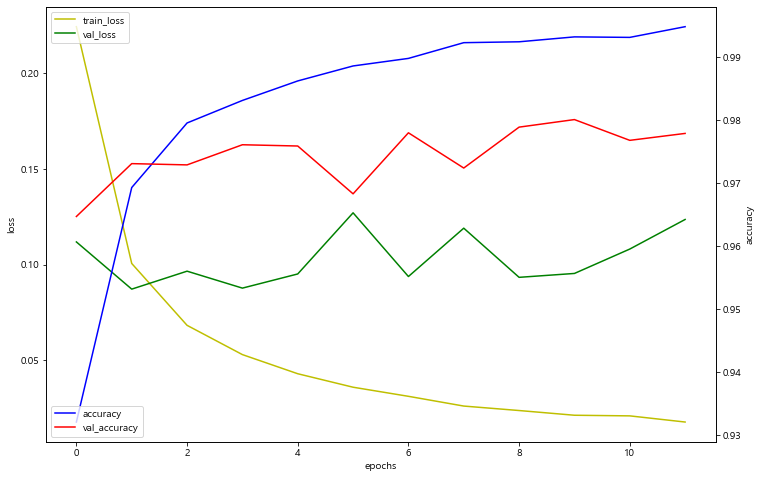

In [11]:
# 1. 데이터 셋 생성
width = 28; height = 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width*height).astype('float32')/255.0
x_test = x_test.reshape(10000, width*height).astype('float32')/255.0

x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(y_test)

# 2. 모델 생성
model = Sequential()
model.add(Dense(256, input_dim=width*height, activation='relu'))
model.add(Dense(256, input_dim=width*height, activation='relu'))
model.add(Dense(128, input_dim=width*height, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 3. 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 학습시키기
early_stopping = EarlyStopping(patience=10)
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val), callbacks=[early_stopping])

# 5. 학습과정 살펴보기 
fig, loss_ax = plt.subplots(figsize=(12,8))
loss_ax.plot(hist.history['loss'],'y',label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'g', label='val_loss')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')

acc_ax =loss_ax.twinx() #x축을 공유하는 acc_ax와 loss_ax
acc_ax.plot(hist.history['accuracy'],'b',label='accuracy')
acc_ax.plot(hist.history['val_accuracy'],'r',label='val_accuracy')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

In [12]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 777us/step - loss: 0.1224 - accuracy: 0.9766


[0.12238847464323044, 0.9765999913215637]

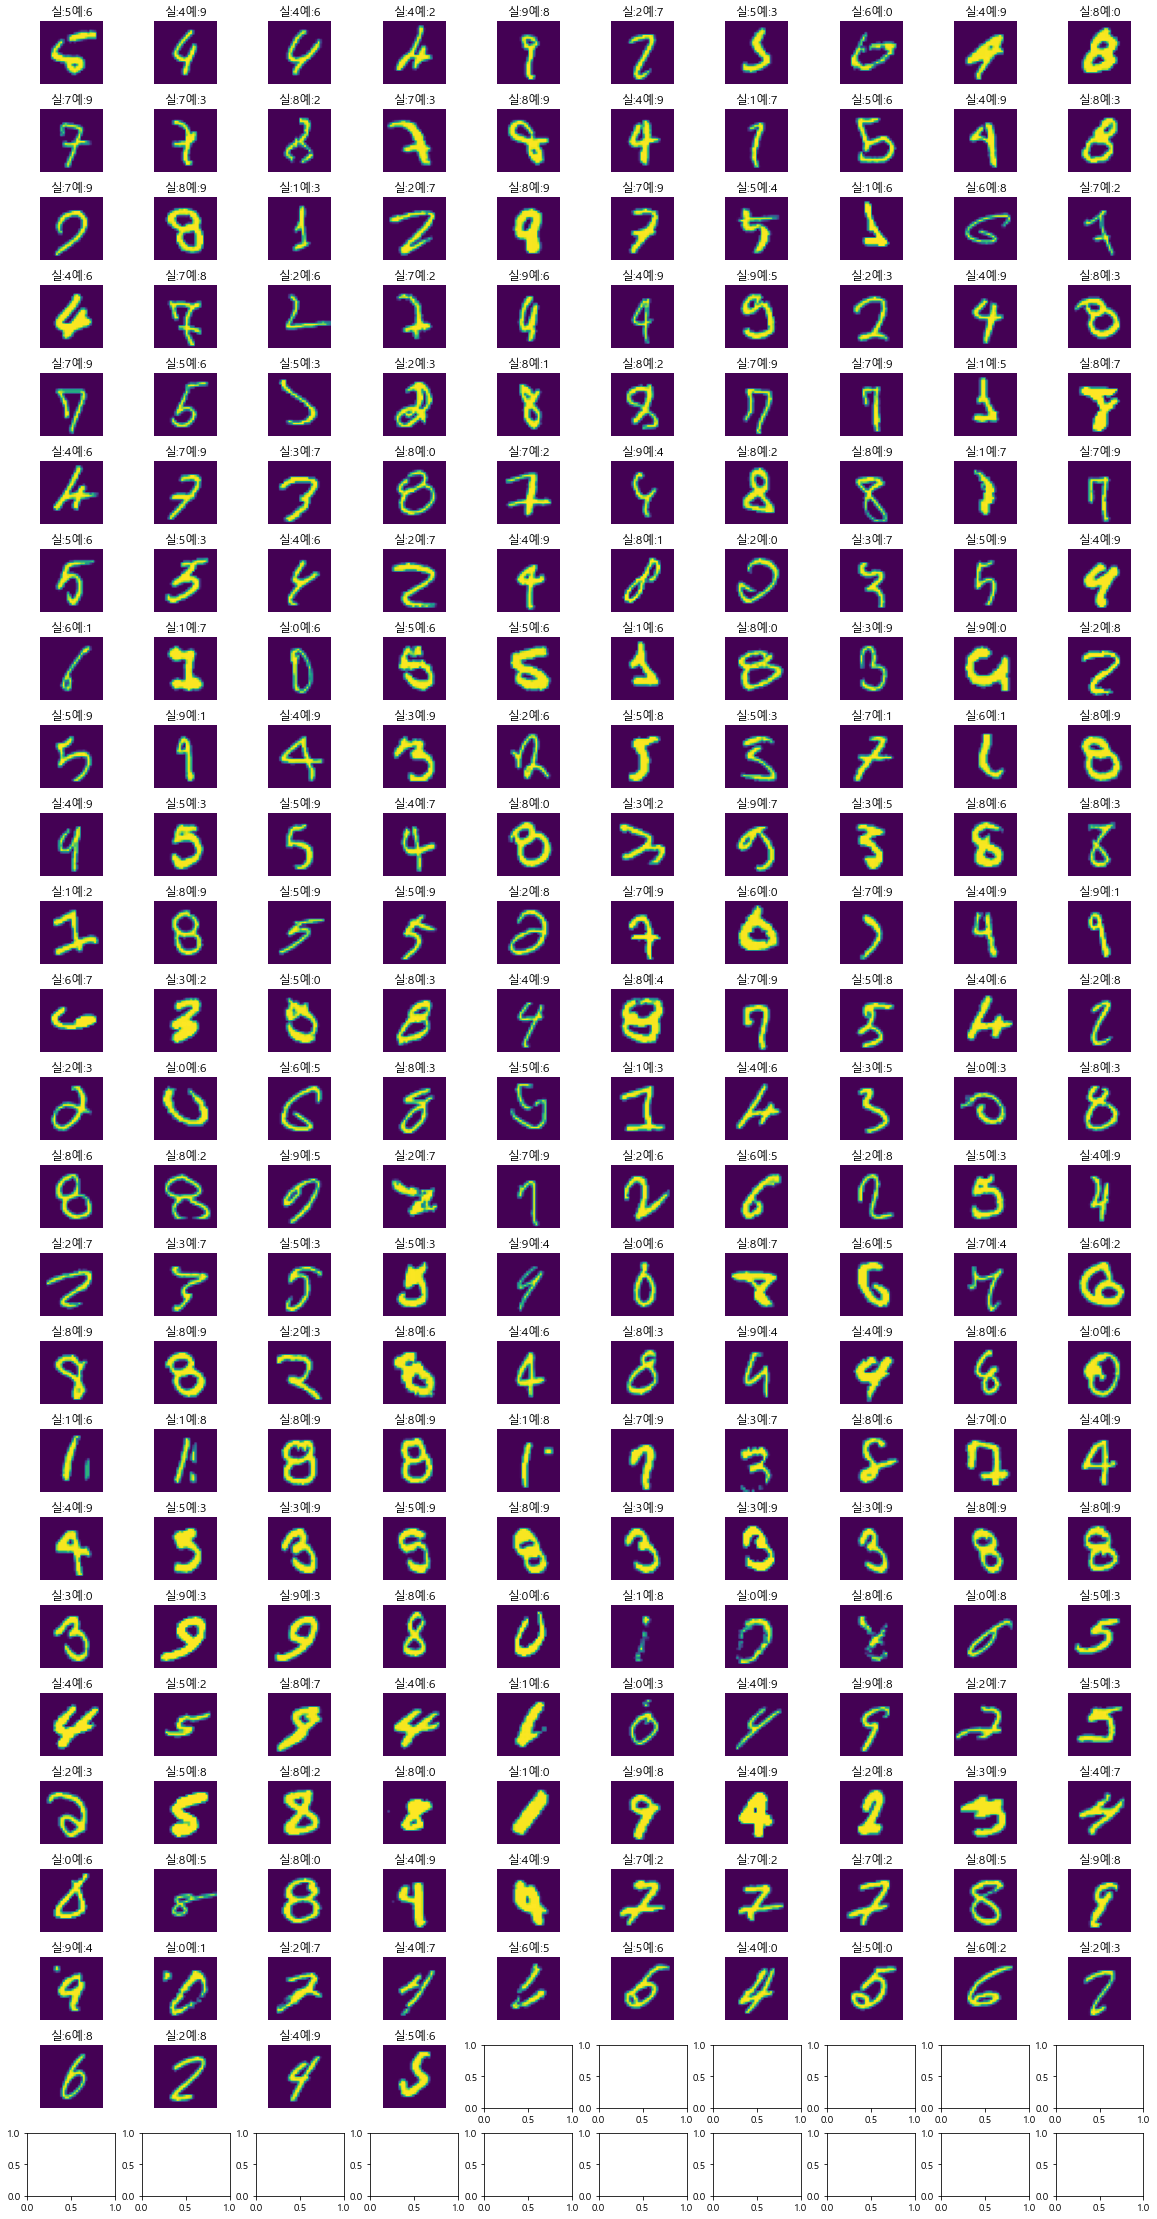

In [24]:
# 모델을 사용하여 예측이 틀린 데이터만 출력
yhat = model.predict(x_test).argmax(axis=1)  #예측치
y = y_test.argmax(axis=1) #실제값

plt_row = 25
plt_col = 10
# plt.figure(figsize=(18,18))
plt.rcParams['figure.figsize']=(20,40)
plt.rc("font",family="Malgun Gothic")
fig, axarr = plt.subplots(plt_row, plt_col)
plt.subplots_adjust(hspace=0.4, wspace=0.3)

i = 0 # yhat과 y 접근 index
cnt = 0 #출력횟수
while (cnt < (plt_row * plt_col)) & (i<len(y)):
    if yhat[i] == y[i]:
        i+=1
        continue
    sub_plot = axarr[cnt//10,cnt%10]
    sub_plot.imshow(x_test[i].reshape(width, height))
    sub_plot.axis('off')
    title = '실:'+str(y[i])+"예:"+str(yhat[i])
    sub_plot.set_title(title)
    i+=1
    cnt+=1

# 2.CNN(컨볼루션 레이어 포함)

Epoch 1/30
1563/1563 [==============================] - 18s 11ms/step - loss: 0.1574 - accuracy: 0.9515 - val_loss: 0.0542 - val_accuracy: 0.9844
Epoch 2/30
1563/1563 [==============================] - 18s 12ms/step - loss: 0.0534 - accuracy: 0.9833 - val_loss: 0.0402 - val_accuracy: 0.9871
Epoch 3/30
1563/1563 [==============================] - 18s 12ms/step - loss: 0.0379 - accuracy: 0.9880 - val_loss: 0.0404 - val_accuracy: 0.9882
Epoch 4/30
1563/1563 [==============================] - 18s 12ms/step - loss: 0.0303 - accuracy: 0.9904 - val_loss: 0.0594 - val_accuracy: 0.9832
Epoch 5/30
1563/1563 [==============================] - 18s 12ms/step - loss: 0.0255 - accuracy: 0.9920 - val_loss: 0.0430 - val_accuracy: 0.9900
Epoch 6/30
1563/1563 [==============================] - 18s 12ms/step - loss: 0.0207 - accuracy: 0.9931 - val_loss: 0.0324 - val_accuracy: 0.9904
Epoch 7/30
1563/1563 [==============================] - 18s 12ms/step - loss: 0.0194 - accuracy: 0.9936 - val_loss: 0.0336 -

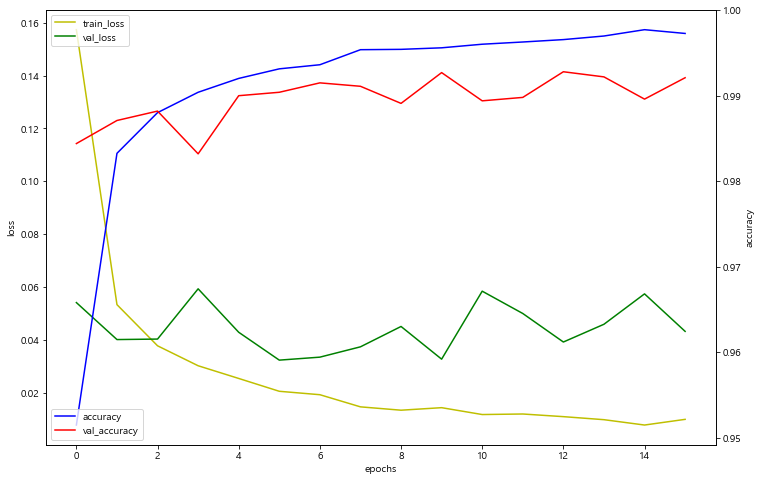

In [27]:
# 1. 데이터 셋 생성
width = 28; height = 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width, height, 1).astype('float32')/255.0
x_test = x_test.reshape(10000, width, height, 1).astype('float32')/255.0

x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(y_test)

# 2. 모델 생성
model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu', input_shape=(width, height, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 3. 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 학습시키기
early_stopping = EarlyStopping(patience=10)
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val), callbacks=[early_stopping])

# 5. 학습과정 살펴보기 
fig, loss_ax = plt.subplots(figsize=(12,8))
loss_ax.plot(hist.history['loss'],'y',label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'g', label='val_loss')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')

acc_ax =loss_ax.twinx() #x축을 공유하는 acc_ax와 loss_ax
acc_ax.plot(hist.history['accuracy'],'b',label='accuracy')
acc_ax.plot(hist.history['val_accuracy'],'r',label='val_accuracy')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

In [28]:
score = model.evaluate(x_test, y_test, batch_size=50)

200/200 [==============================] - 1s 5ms/step - loss: 0.0357 - accuracy: 0.9918


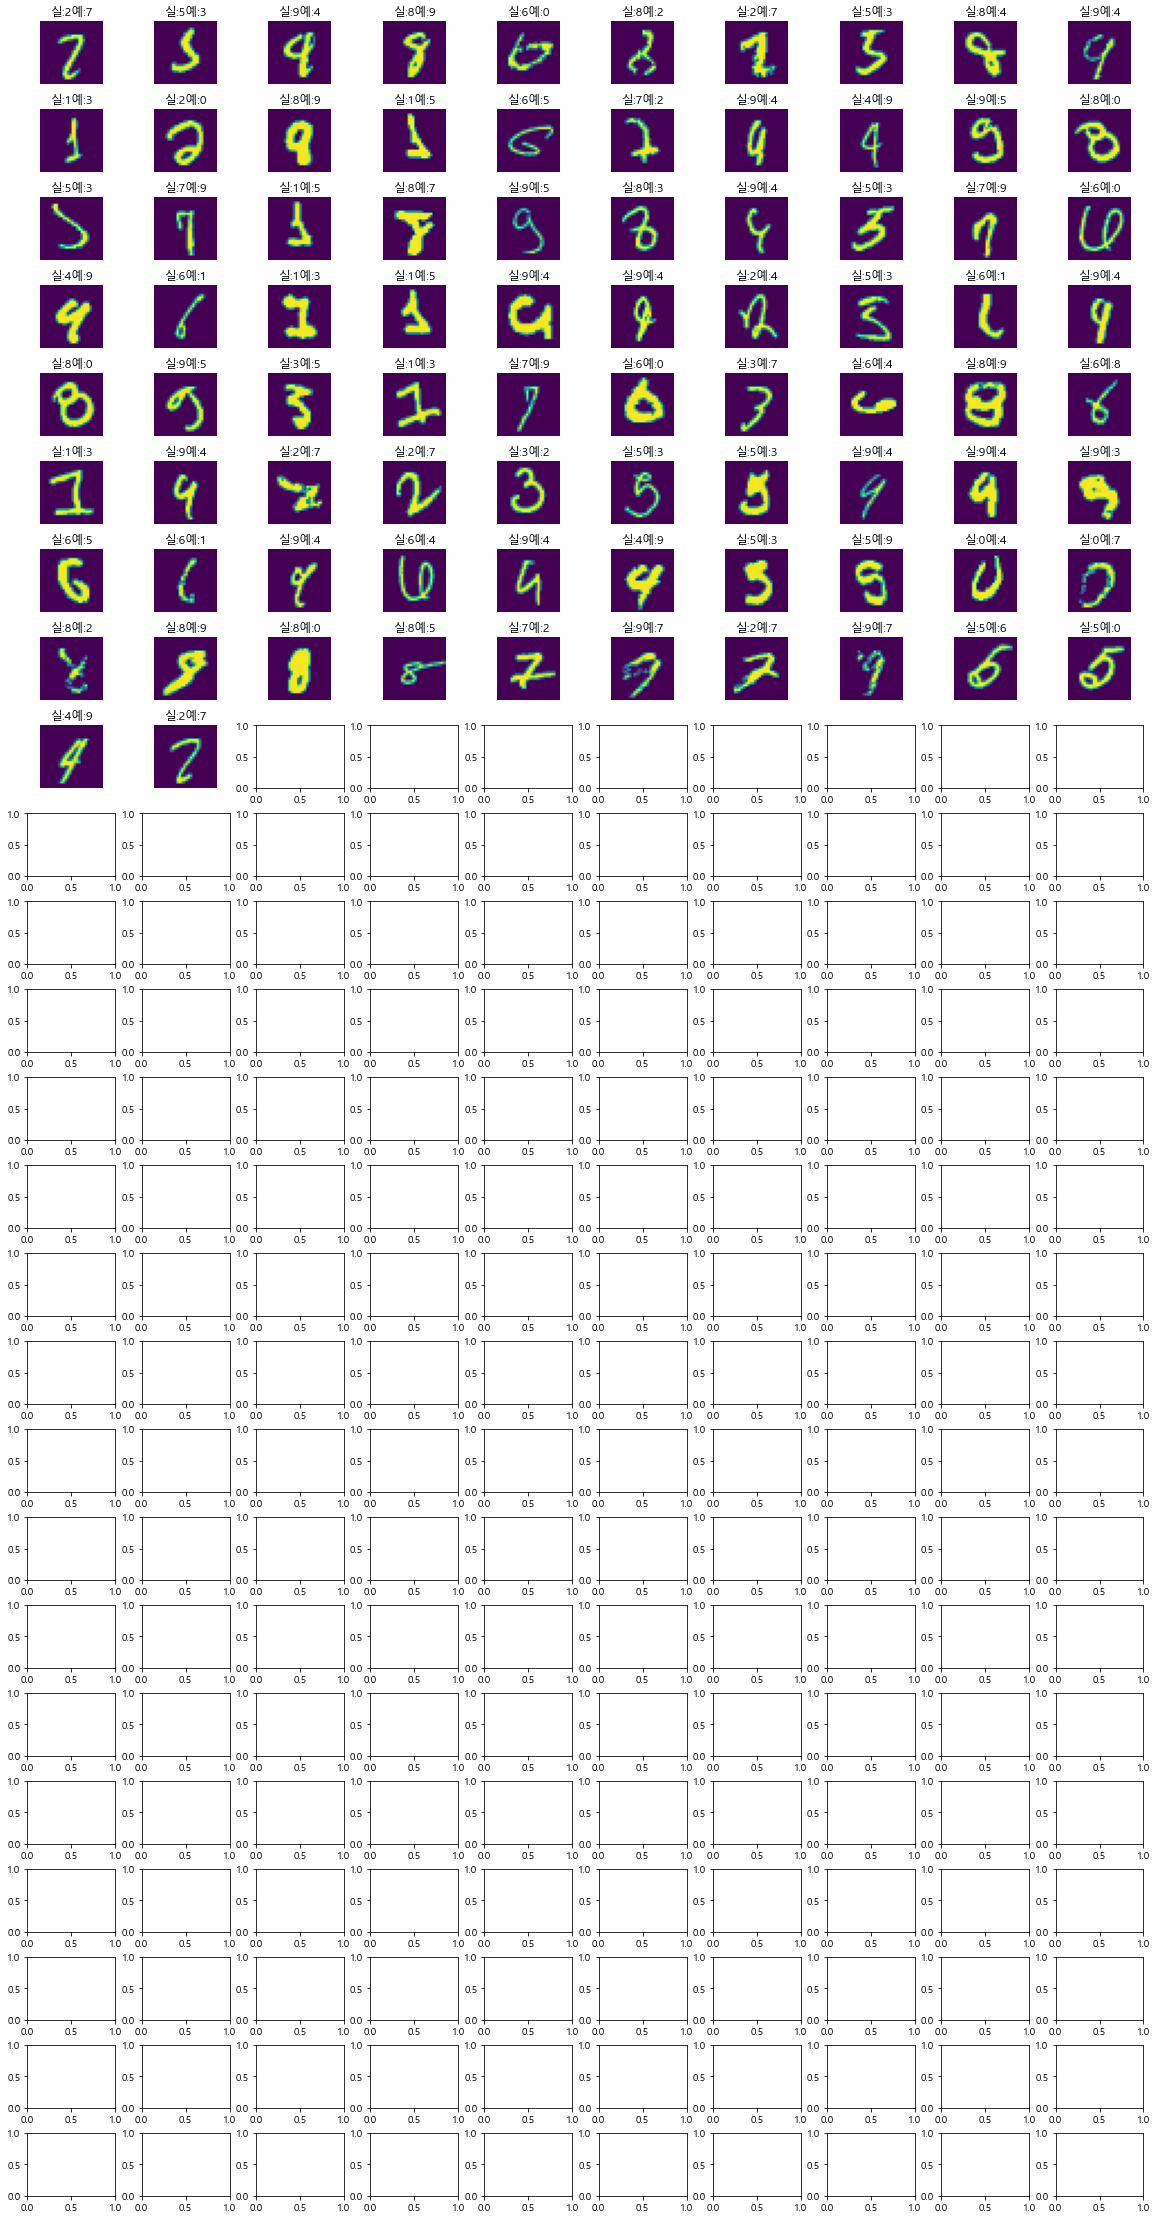

In [29]:
# 모델을 사용하여 예측이 틀린 데이터만 출력
yhat = model.predict(x_test).argmax(axis=1)  #예측치
y = y_test.argmax(axis=1) #실제값

plt_row = 25
plt_col = 10
# plt.figure(figsize=(18,18))
plt.rcParams['figure.figsize']=(20,40)
plt.rc("font",family="Malgun Gothic")
fig, axarr = plt.subplots(plt_row, plt_col)
plt.subplots_adjust(hspace=0.4, wspace=0.3)

i = 0 # yhat과 y 접근 index
cnt = 0 #출력횟수
while (cnt < (plt_row * plt_col)) & (i<len(y)):
    if yhat[i] == y[i]:
        i+=1
        continue
    sub_plot = axarr[cnt//10,cnt%10]
    sub_plot.imshow(x_test[i].reshape(width, height))
    sub_plot.axis('off')
    title = '실:'+str(y[i])+"예:"+str(yhat[i])
    sub_plot.set_title(title)
    i+=1
    cnt+=1